<a href="https://colab.research.google.com/github/Nurus786/OIBSIP_INTERNSHIP/blob/main/oasis_internship_DataAnalytics_ipynb_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROJECT-3 LEVEL 2


FRAUD DETECTION

In [2]:
import pandas as pd
import numpy as np
import zipfile
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [8]:
df=pd.read_csv("/content/drive/MyDrive/Fraud Detection/creditcard.csv")

In [19]:
# Basic data exploration
print("Dataset shape:", df.shape)
print("First few rows of the dataset:")
print(df.head())
print("Dataset info:")
print(df.info())
print("Class distribution:")
print(df['Class'].value_counts())

Dataset shape: (284807, 31)
First few rows of the dataset:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.1374

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


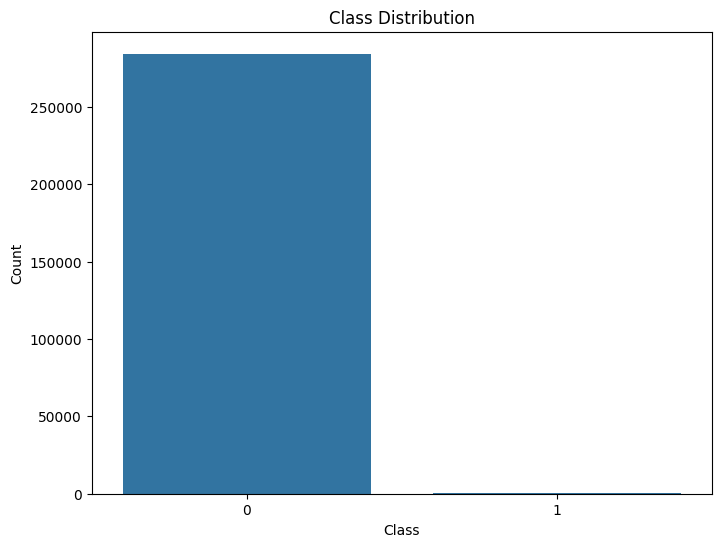

In [26]:
print(df.columns)
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Preprocessing
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Feature and target separation
X = df.drop('Class', axis=1)
y = df['Class']

# Normalize feature
scaler = StandardScaler()  # Instantiate the scaler
X_scaled = scaler.fit_transform(X)  # Apply fit_transform

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


Missing values in each column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# Define models with adjusted parameters
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, solver='liblinear'),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=10),  # Adjusted parameters
    'Neutral Network': MLPClassifier(max_iter=1000, solver='adam', verbose=True)  # Added verbosity
}

for name, model in models.items():
    print(f"\nTraining {name}...")
    try:
        model.fit(X_train, y_train)
        print(f"{name} trained successfully.")
    except KeyboardInterrupt:
        print(f"Training {name} interrupted.")



Training Logistic Regression...
Logistic Regression trained successfully.

Training Random Forest...
Training Random Forest interrupted.

Training Neutral Network...
Neutral Network trained successfully.


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# Define models with adjusted parameters
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, solver='liblinear'),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=10),  # Adjusted parameters
    'Neutral Network': MLPClassifier(max_iter=1000, solver='adam', verbose=True)  # Added verbosity
}

for name, model in models.items():
    print(f"\nTraining {name}...")
    try:
        model.fit(X_train, y_train)
        print(f"{name} trained successfully.")
    except KeyboardInterrupt:
        print(f"Training {name} interrupted.")



Training Logistic Regression...
Logistic Regression trained successfully.

Training Random Forest...
Random Forest trained successfully.

Training Neutral Network...
Iteration 1, loss = 0.02998199
Iteration 2, loss = 0.00363047
Iteration 3, loss = 0.00312808
Iteration 4, loss = 0.00279592
Iteration 5, loss = 0.00265516
Iteration 6, loss = 0.00247444
Iteration 7, loss = 0.00241313
Iteration 8, loss = 0.00228339
Iteration 9, loss = 0.00220797
Iteration 10, loss = 0.00204294
Iteration 11, loss = 0.00200922
Iteration 12, loss = 0.00190398
Iteration 13, loss = 0.00194513
Iteration 14, loss = 0.00181290
Iteration 15, loss = 0.00167673
Iteration 16, loss = 0.00172408
Iteration 17, loss = 0.00159351
Iteration 18, loss = 0.00171633
Iteration 19, loss = 0.00160035
Iteration 20, loss = 0.00145721
Iteration 21, loss = 0.00152772
Iteration 22, loss = 0.00137933
Iteration 23, loss = 0.00139739
Iteration 24, loss = 0.00136323
Iteration 25, loss = 0.00126831
Iteration 26, loss = 0.00128910
Iteration 

In [33]:
# Prediction
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Use predict_proba if you need probabilities

# Check dimensions
print(f"y_test shape: {y_test.shape}")
print(f"y_pred shape: {y_pred.shape}")

# Evaluation
print(f"\n{name} classification report:")
print(classification_report(y_test, y_pred))
print(f"{name} Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)


y_test shape: (85443,)
y_pred shape: (85443,)

Neutral Network classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.81      0.85      0.83       136

    accuracy                           1.00     85443
   macro avg       0.90      0.92      0.91     85443
weighted avg       1.00      1.00      1.00     85443

Neutral Network Confusion Matrix:
[[85280    27]
 [   21   115]]


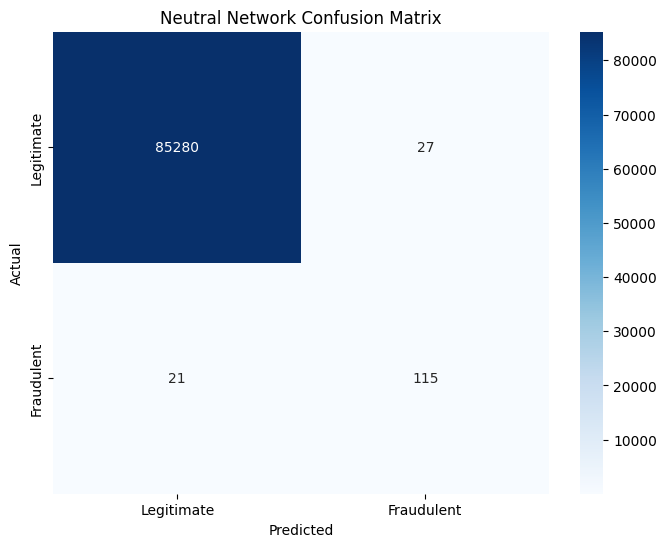

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Fraudulent'], yticklabels=['Legitimate', 'Fraudulent'])
plt.title(f'{name} Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


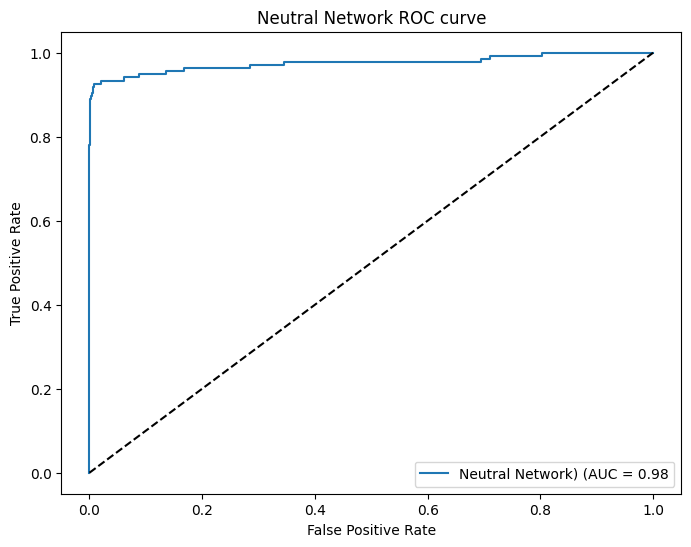

In [36]:
# ROC curve
fpr,tpr,_ = roc_curve(y_test, y_prob)
roc_auc = auc (fpr,tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr,tpr, label=f'{name}) (AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.title(f'{name} ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [37]:
print("Script completed.")

Script completed.
